<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Tree-based Methods

### Author: Aleksy Pruszkowski


1. **Local RSS minimization (1) is equivalent to RSS gain maximization (2)** \\
Since the parent node is fixed and we optimize over features $X_j$ and threshold $t$ therefore the parent RSS is fixed. The equivalence follows from the fact that
$$ \arg\min_{X_j, t} f(X_j,t) = \arg\max_{X_j, t} (C-f(X_j,t)). $$
2. We will show below that **local RSS minimization (as well as RSS gain maximization) is not equivalent to total RSS minimization**

Let's consider a following dataset:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

xx, yy = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
xx1 = xx.flatten()
yy1 = yy.flatten()
resp = xx1
for i in range(len(xx1)):
  if xx1[i] > 5:
    if yy1[i] > 6:
      resp[i] = 1
    else:
      resp[i] = 0
  else:
    if yy1[i] < 4:
      resp[i] = 0
    else:
      resp[i] = 1

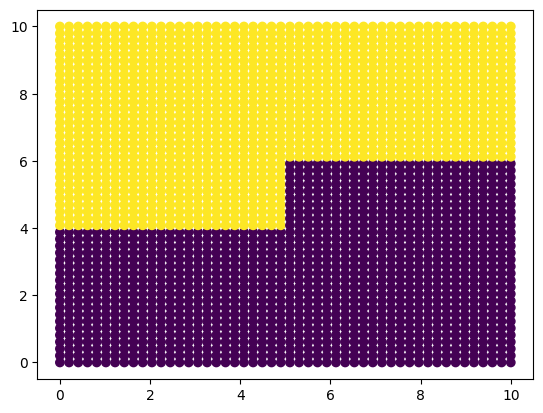

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xx,yy,c=resp)
plt.show()

If we were to construct a tree with maximum depth 2 using DecisionTreeRegressor the leaves will still have non-zero RSS.

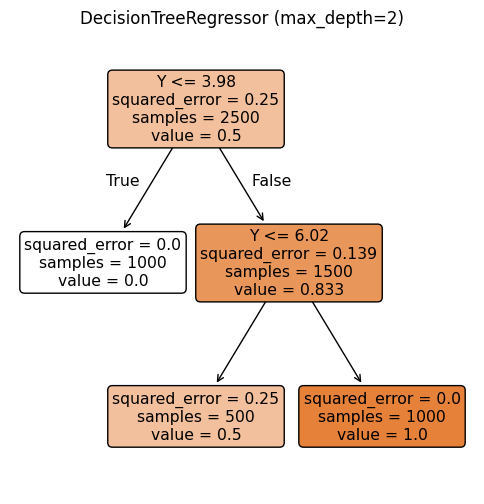

In [ ]:
from sklearn.tree import plot_tree
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_grid = resp
tree_grid = DecisionTreeRegressor(max_depth=2)
tree_grid.fit(X_grid, y_grid)
plt.figure(figsize=(6,6))
plot_tree(tree_grid, feature_names=["X", "Y"], filled=True, rounded=True)
plt.title("DecisionTreeRegressor (max_depth=2)")
plt.show()

We can see however that by splitting X axis first and then splitting the remaining halfs we get a tree with depth 2 and zero RSS in leaves. \
We therefore can conclude that DecisionTreeRegressor uses local RSS minimisation.